In [3]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer



In [4]:
rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ai-step2/exp_submit_single")
rv.write_stats()

df_stats = rv.fetch_stats()
# display(df_stats)
display(df_stats.select(["run_id", "optimizer", "mixup", "train_acc", "train_trans", "epochs", "max_lr", "test_f1"]))

# df_stats_ext = df_stats
# df_stats_ext = df_stats.filter((pl.col("test_f1").is_not_null()))
# df_stats_ext = df_stats.filter((pl.col("run_id").is_in([0, 1, 2, 3, 4])))
# df_stats_ext = df_stats.filter((pl.col("run_id") >= 8) | (pl.col("run_id") <= 15))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))
df_stats_ext = df_stats.filter((pl.col("test_f1").is_not_null()))

run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))

display(df_agg)
# display(df_agg)

run_id,optimizer,mixup,train_acc,train_trans,epochs,max_lr,test_f1
i64,str,bool,f64,str,i64,f64,f64
0,"""SGD ( Paramete…",true,0.92519,"""[ToTensor(), L…",1000,0.001,60.162
1,"""SGD ( Paramete…",true,0.923108,"""[ToTensor(), L…",1000,0.001,59.172
2,"""SGD ( Paramete…",true,0.92527,"""[ToTensor(), L…",1000,0.002,58.735
3,"""SGD ( Paramete…",true,0.924955,"""[ToTensor(), L…",1000,0.003,59.504
4,"""SGD ( Paramete…",true,0.998502,"""[ToTensor(), L…",1000,0.001,58.441
5,"""Lion ( Paramet…",true,0.932831,"""[ToTensor(), L…",1000,0.00001,59.712
6,"""Lion ( Paramet…",true,0.919861,"""[ToTensor(), L…",300,0.00001,58.45
7,"""SGD ( Paramete…",true,0.931685,"""[ToTensor(), L…",300,0.001,54.165
8,"""SGD ( Paramete…",true,0.905125,"""[ToTensor(), L…",1000,0.001,57.837


run_id,step,lr,epoch,train_loss,train_acc,train_f1,mixup_e
i32,list[i64],list[f64],list[i64],list[f64],list[f64],list[f64],list[bool]
0,"[1, 2, … 1000]","[0.001, 0.001, … 2.4674e-9]","[1, 2, … 1000]","[1.484728, 1.214581, … 0.122442]","[0.689282, 0.814169, … 0.92519]","[0.233968, 0.279197, … 0.53464]","[null, null, … null]"
1,"[1, 2, … 1000]","[0.001, 0.001, … 2.4674e-9]","[1, 2, … 1000]","[1.366475, 1.029692, … 0.121969]","[0.71359, 0.827232, … 0.923108]","[0.235181, 0.288573, … 0.530835]","[null, null, … null]"
2,"[1, 2, … 1000]","[0.002, 0.002, … 4.9348e-9]","[1, 2, … 1000]","[1.314838, 1.077366, … 0.134873]","[0.723888, 0.816445, … 0.92527]","[0.234736, 0.274465, … 0.530588]","[null, null, … null]"
3,"[1, 2, … 1000]","[0.003, 0.003, … 7.4022e-9]","[1, 2, … 1000]","[2.683145, 1.812399, … 0.130077]","[0.613651, 0.814381, … 0.924955]","[0.215871, 0.277473, … 0.533938]","[null, null, … null]"
4,"[1, 2, … 1000]","[0.001, 0.001, … 2.4674e-9]","[1, 2, … 1000]","[1.399009, 1.015885, … 0.004005]","[0.687413, 0.836914, … 0.998502]","[0.234534, 0.29584, … 0.984427]","[true, true, … false]"
5,"[1, 2, … 1000]","[0.00001, 0.00001, … 2.4674e-11]","[1, 2, … 1000]","[1.547554, 0.965347, … 0.099816]","[0.600553, 0.812047, … 0.932831]","[0.208927, 0.293999, … 0.479219]","[null, null, … null]"
6,"[1, 2, … 300]","[0.00001, 0.00001, … 2.7415e-10]","[1, 2, … 300]","[1.490656, 1.005638, … 0.125442]","[0.591458, 0.788615, … 0.919861]","[0.211595, 0.288618, … 0.548975]","[null, null, … null]"
7,"[1, 2, … 300]","[0.001, 0.001, … 2.7415e-8]","[1, 2, … 300]","[1.373481, 1.029654, … 0.158354]","[0.68436, 0.827987, … 0.931685]","[0.239413, 0.283206, … 0.548691]","[null, null, … null]"
8,"[1, 2, … 1000]","[0.001, 0.001, … 2.4674e-9]","[1, 2, … 1000]","[5.990644, 2.896771, … 0.303729]","[0.39969, 0.490323, … 0.905125]","[0.171833, 0.195856, … 0.463529]","[null, null, … null]"


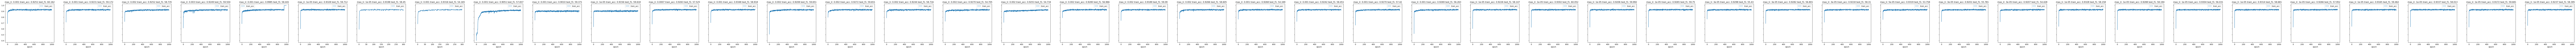

In [5]:
x_col = "epoch"
# y_cols = ["train_loss", "val_loss"]
y_cols = ["train_acc"]
titles = ["max_lr", "train_acc", "test_f1"]


fig, ax = plt.subplots(nrows=1, ncols=len(df_agg), squeeze=False, sharey=True)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(df_agg))
fig.set_figheight(4 * 1)

for i, df_row in enumerate(df_agg.iter_rows(named=True)):
    ax[0][i].set_xlabel(x_col)
    title_str = ""
    for ti, title in enumerate(titles):
        if ti != 0:
            title_str += " "
        title_str += f'{title}: {str(df_stats.filter(pl.col("run_id") == df_row["run_id"])[title][0])[:6]}'
        # title_str += f'{title}: {df_stats.filter(pl.col("run_id") == df_row["run_id"])[title][0]}'
    ax[0][i].set_title(title_str)
    for y_col in y_cols:
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = y_col

        ax[0][i].plot(x, y, label=label)
    ax[0][i].legend()






KeyError: 'val_acc'

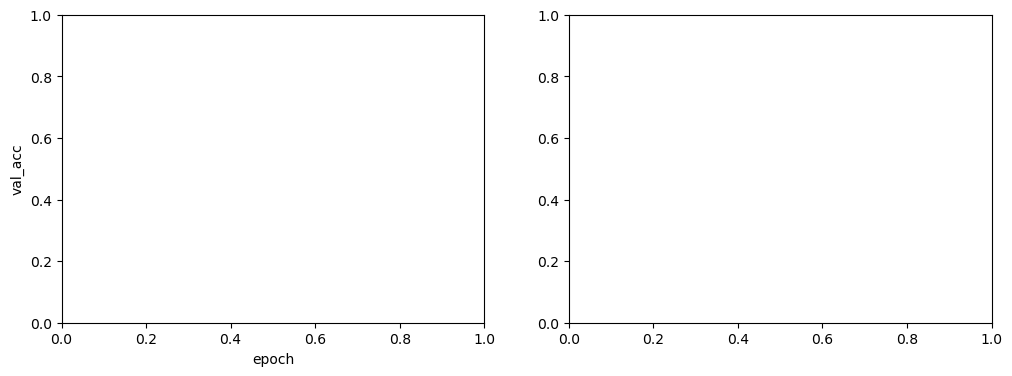

In [6]:
x_col = "epoch"
y_cols = ["val_acc", "val_loss"]
label_col = "max_lr"

fig, ax = plt.subplots(nrows=1, ncols=len(y_cols), squeeze=False, sharey=False)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(y_cols))
fig.set_figheight(4 * 1)

for i, y_col in enumerate(y_cols):
    ax[0][i].set_xlabel(x_col)
    ax[0][i].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

        ax[0][i].plot(x, y, label=label)

    ax[0][i].legend()





In [7]:
rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ai-step2/exp_ft_sgd")
rv.write_stats()